In [4]:
#D12 Task 2

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np


# Load the data
df = pd.read_csv("churn_clean.csv")

#C1
# Define the continuous variables
continuous_vars = ["Outage_sec_perweek", "Yearly_equip_failure", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"]

# Display data information
print(df.head())

print("\nDescriptive statistics:")
print(df[continuous_vars].describe())

print("\nInfo on variables:")
print(df[continuous_vars].info())


   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [2]:
# df for continuous variables
df_continuous = df[continuous_vars]

# Standardize the variables
scaler = StandardScaler()
df_continuous_scaled = pd.DataFrame(scaler.fit_transform(df_continuous), columns=continuous_vars)

#C2
#Save data
df_continuous_scaled.to_csv("processed_data.csv", index=False)


Factor Loadings Matrix:
Principal Component 1:
	Outage_sec_perweek: 0.0084
	Yearly_equip_failure: 0.6757
	Tenure: 0.3550
	MonthlyCharge: -0.6461
	Bandwidth_GB_Year: 0.0000

Principal Component 2:
	Outage_sec_perweek: 0.0242
	Yearly_equip_failure: -0.1796
	Tenure: 0.9303
	MonthlyCharge: 0.3191
	Bandwidth_GB_Year: -0.0000

Principal Component 3:
	Outage_sec_perweek: 0.9965
	Yearly_equip_failure: -0.0450
	Tenure: -0.0067
	MonthlyCharge: -0.0423
	Bandwidth_GB_Year: -0.0567

Principal Component 4:
	Outage_sec_perweek: 0.0574
	Yearly_equip_failure: 0.7283
	Tenure: -0.1003
	MonthlyCharge: 0.6755
	Bandwidth_GB_Year: -0.0036

Principal Component 5:
	Outage_sec_perweek: 0.9983
	Yearly_equip_failure: 0.0017
	Tenure: -0.0131
	MonthlyCharge: 0.0012
	Bandwidth_GB_Year: 0.0568



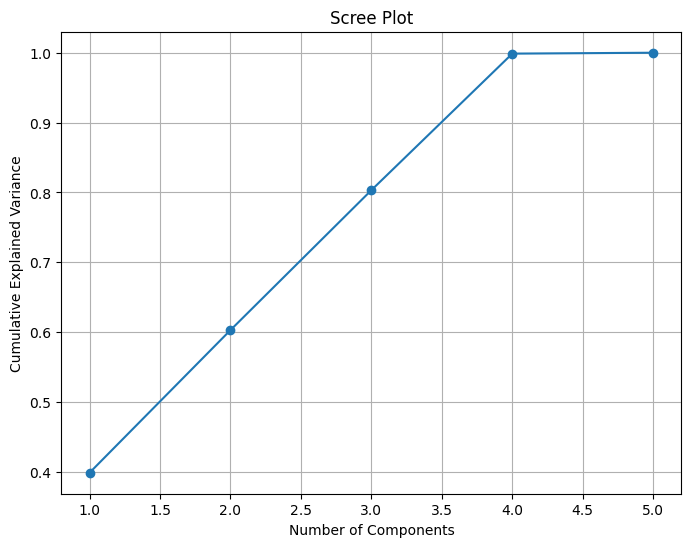

Variance of each principal component:
Principal Component 1: 1.9936618372145198
Principal Component 2: 1.0212370741497536
Principal Component 3: 1.0017246503974377
Principal Component 4: 0.9774175362769393
Principal Component 5: 0.006458951966347855
Number of principal components based on Kaiser criterion: 3

Total variance: 5.000500050004998

Total variance based on Kaiser criterion: 4.016623561761711


In [5]:
# Initialize PCA
pca = PCA()

# Fit PCA 
pca.fit(df_continuous_scaled)

# Extract the names of columns 
column_names = df_continuous_scaled.columns.tolist()

# Obtain factor loadings
factor_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Print matrix
print("Factor Loadings Matrix:")
for i, component in enumerate(factor_loadings):
    print(f"Principal Component {i + 1}:")
    for j, loading in enumerate(component):
        print(f"\t{column_names[j]}: {loading:.4f}")
    print()

# D2
# Plotting the scree plot (Jakevdp, n.d.)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# D3
# Variance of each principal component (Pani, n.d.)
variance_per_component = pca.explained_variance_
print("Variance of each principal component:")
for i, variance in enumerate(variance_per_component):
    print(f"Principal Component {i + 1}: {variance}")

# Kaiser
num_components_kaiser = sum(variance_per_component > 1)
print(f"Number of principal components based on Kaiser criterion: {num_components_kaiser}")

# D4
# Total variance
total_variance = sum(variance_per_component)
total_variance_kaiser = sum(variance_per_component[:num_components_kaiser])
print(f"\nTotal variance: {total_variance}")
print(f"\nTotal variance based on Kaiser criterion: {total_variance_kaiser}")
